## Exercise 3 - **Nonlinear problems**

The goal of this exercise is to consolidate:
- Nonlinear processes
- Advection and diffusion

The goal of this exercise is to program two short 1D codes to experiment with nonlinear processes, namely nonlinear diffusion and advection in order to reproduce the animations displayed in the [nonlinear equations section](#nonlinear-equations) of the lecture 2.

### Task 1

Referring to the [nonlinear equations section](#nonlinear_equations) in lecture 2, implement the nonlinear power-law type parabolic PDE in 1D:

$$
\frac{\partial C}{\partial t} + D\frac{\partial^2 C^n}{\partial x^2} = 0
$$

Use one of your previous scripts or the [`diffusion_1D.jl`](https://github.com/eth-vaw-glaciology/course-101-0250-00/blob/main/scripts/) to get you started. Use the following parameters:

```julia
# physics
lx   = 20.0
dc   = 1.0
n    = 4
# numerics
nx   = 200
nvis = 50
# derived numerics
dx   = lx/nx
dt   = dx^2/dc/10
nt   = nx^2 ÷ 5
xc   = LinRange(dx/2,lx-dx/2,nx)
```
and initialising your quantity to diffuse as `0.5cos(9π*xc/lx)+0.5`.

Make sure your code reproduces the animation from the course.

### Answer 1





Here we implement the nonlinear parabolic equation of the power-law type for $n=4$, which describes the deformation of shallow currents of fluids with high viscosity such as ice or lava under their own weight.

$$
\frac{\partial C}{\partial t} + D\frac{\partial^2 C^4}{\partial x^2} = 0
$$


In [1]:
using Plots

@views function nonlinear_powerlaw()
    
    # physics
    lx   = 20.0
    dc   = 1.0
    n    = 4    # power
    
    # numerics
    nx   = 200
    nvis = 50
    
    # derived numerics
    dx   = lx/nx
    dt   = dx^2/dc/10
    nt   = nx^2 ÷ 5
    xc   = LinRange(dx/2,lx-dx/2,nx)
    
    # array initialisation
    C    = @. 0.5cos(9π*xc/lx)+0.5; C_i = copy(C)
    qx   = zeros(Float64, nx-1)
    
# time loop
 @gif for it = 1:nt
        qx          .= .-dc.*diff(C .^n)./dx
        C[2:end-1] .-=   dt.*diff(qx)./dx
        plot(xc,[C_i,C];xlims=(0,lx), ylims=(-0.1,1.1),
                      xlabel="lx", ylabel="Concentration", aspect_ratio=5,
                      title="1D Nonlinear parabolic PDE (n = $(n)), time = $(round(it*dt,digits=1))")
    end every nvis
end



nonlinear_powerlaw (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /home/youwuyou/workspace/julia/pde-on-gpu-wu/lecture2/tmp.gif
└ @ Plots /home/youwuyou/.julia/packages/Plots/nbICw/src/animation.jl:139


Plots.AnimatedGif("/home/youwuyou/workspace/julia/pde-on-gpu-wu/lecture2/tmp.gif")
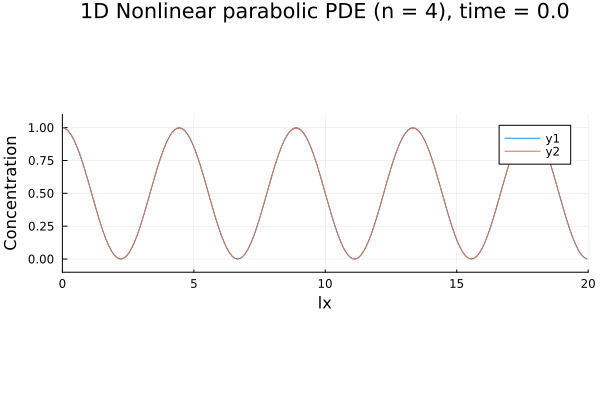

In [2]:
nonlinear_powerlaw()

### Task 2

Referring to the [nonlinear equations section](#nonlinear_equations) in lecture 2, implement the nonlinear advection _inviscid Burgers'_ equation in 1D:

$$
\frac{\partial C}{\partial t} + \frac{\partial C^n}{\partial x} = 0
$$

Use one of your previous scripts or the [`diffusion_1D.jl`](https://github.com/eth-vaw-glaciology/course-101-0250-00/blob/main/scripts/) to get you started. Use the following parameters:

```julia
# physics
lx   = 20.0
vx   = 1.0
n    = 2
# numerics
nx   = 1000
nvis = 15
# derived numerics
dx   = lx/nx
dt   = dx/abs(vx)/2
nt   = 2nx
xc   = LinRange(dx/2,lx-dx/2,nx)
```
As initial condition, define a Gaussian profile of the quantity $C$ of amplitude and standard deviation equal to 1, located at `lx/4`.

Make sure your code reproduces the animation from the course.

### Answer 2

Recall the advection equation learnt in the course under the assumption that we have an incompressible flow:

$$ \frac{∂C}{∂t} = -v_x \frac{∂C}{∂x} ~.$$


Here we implement the nonlinear advection equation with $v_x = 1.0$, which is also called as the inviscid burger equation for $n=2$, which describes the formation of shock wave.

The nonlinearity is brought by the exponent of the quantity $C$ at the RHS.

$$
\frac{\partial C}{\partial t} + \frac{\partial C^2}{\partial x} = 0
$$

In [3]:
# nonlinear_inviscid_burger equation
# parabolic PDE
@views function shockwave_1D()
        # physics
    lx   = 20.0
    vx   = 1.0
    n    = 2    # power
    
    # numerics
    nx   = 1000
    nvis = 15
    
    # derived numerics
    dx   = lx/nx
    dt   = dx/abs(vx)/2.
    nt   = 2. * nx
    xc   = LinRange(dx/2,lx-dx/2,nx)
    
    # array initialisation
    C  = @. exp(-(xc - lx/4.)^2 / 2.); C_i = copy(C)
    
# time loop
 @gif for it = 1:nt
        (vx < 0) && (C[1:end-1] .-= dt.* vx .* diff(C.^2)./dx) 
        (vx > 0) && (C[2:end] .-= dt .* vx .* diff(C.^2)./dx)
    
    (it % (nt÷2) == 0) && (vx = - vx) # change the direction of wave propagation

    plot(xc,[C_i,C];xlims=(0,lx), ylims=(-0.1,1.1),
                      xlabel="lx", ylabel="Concentration", aspect_ratio=5,
                      title="1D inviscid Burger equation (n = $(n)), time = $(round(it*dt,digits=1))")
    end every nvis

end

shockwave_1D (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /home/youwuyou/workspace/julia/pde-on-gpu-wu/lecture2/tmp.gif
└ @ Plots /home/youwuyou/.julia/packages/Plots/nbICw/src/animation.jl:139


Plots.AnimatedGif("/home/youwuyou/workspace/julia/pde-on-gpu-wu/lecture2/tmp.gif")
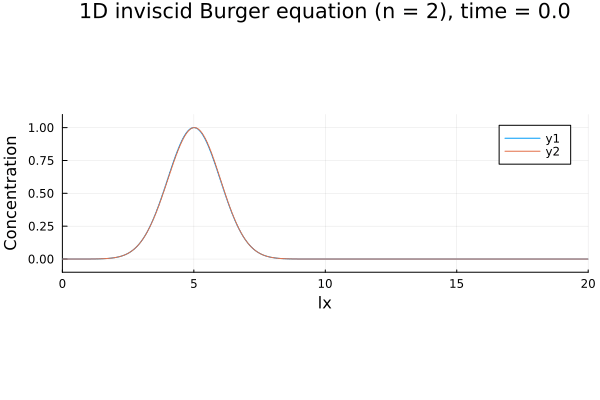

In [4]:
shockwave_1D()

> P.S. For both solutions the generated gif files can be found in the `docs` repository of this week's folder.